<a href="https://colab.research.google.com/github/ikarus-999/AI-NLP-Study/blob/master/STFT_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
print(tf.__version__)

1.15.0


In [2]:
print(tf.executing_eagerly())

True


## check GPU 

In [3]:
from datetime import datetime

startTime = datetime.now()

shape = (int(100000), int(100000))
with tf.device("/gpu"):
    random_matrix = tf.random.uniform(shape=shape, minval=0, maxval=1)
    dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
    sum_operation = tf.reduce_sum(dot_operation)

result = sum_operation
print(result)

print("\n" * 2)
print("Time taken:", datetime.now() - startTime)
print("\n" * 2)

ResourceExhaustedError: ignored

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!pip install -q librosa

In [6]:
!apt update -qq
!apt install -y -qq ffmpeg

91 packages can be upgraded. Run 'apt list --upgradable' to see them.
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 91 not upgraded.


In [7]:
!ffmpeg -version

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-

In [0]:
!wget -q https://github.com/Tony607/blog_statics/releases/download/v1.0/siren_mfcc_demo.wav

# Decode wav file

In [9]:
## Check the sampling rate of the WAV file.
audio_file = './siren_mfcc_demo.wav'

import wave
with wave.open(audio_file, "rb") as wave_file:
    sr = wave_file.getframerate()
print(sr)

44100


In [10]:
audio_binary = tf.read_file(audio_file)
waveform = tf.contrib.ffmpeg.decode_audio(audio_binary, file_format='wav', samples_per_second=sr, channel_count=1)
print(waveform.numpy().shape)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
tf.contrib.ffmpeg will be removed in 2.0, the support for video and audio will continue to be provided in tensorflow-io: https://github.com/tensorflow/io
(59904, 1)


In [11]:
signals = tf.reshape(waveform, [1, -1])
signals.get_shape()

TensorShape([Dimension(1), Dimension(59904)])

# preprocessing

In [12]:
# STFT
waves = tf.signal.stft(signals, frame_length=1024, frame_step=512, fft_length=1024)
print(waves.numpy().shape)

# ComplexWarning: Casting complex values to real discards the imaginary part 
# plt.imshow(np.transpose(array))
# plt.imshow(np.swapaxes(array, 0, 1))

(1, 116, 513)


In [13]:
power_spectrograms = tf.real(waves * tf.conj(waves))
spectrograms = tf.abs(waves)

print(power_spectrograms.numpy().shape)
print(spectrograms.numpy().shape)

(1, 116, 513)
(1, 116, 513)


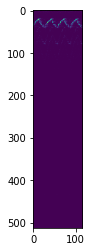

In [14]:
array = power_spectrograms.numpy().astype(np.float)[0]
array2 = spectrograms.numpy().astype(np.float)[0]

plt.imshow(np.transpose(array2))

In [15]:
print(array2)

[[3.64097166e+00 2.41182685e+00 6.54704690e-01 ... 6.29515201e-03
  4.20766370e-03 5.17010689e-04]
 [1.08613100e+01 7.61867905e+00 1.27803600e+00 ... 1.21404894e-03
  1.86399207e-03 2.40802765e-03]
 [7.10813236e+00 3.55544686e+00 1.76103079e+00 ... 1.90656888e-03
  4.29067481e-03 2.82764435e-03]
 ...
 [3.15776014e+00 3.85140562e+00 1.95221400e+00 ... 2.35843915e-03
  3.07763368e-03 1.15537643e-03]
 [1.97151244e+00 4.87544727e+00 2.16735101e+00 ... 3.62202339e-03
  4.10083029e-03 1.84667110e-03]
 [1.07135525e+01 6.92161274e+00 1.74895644e+00 ... 1.02343364e-03
  1.57504808e-03 3.83853912e-04]]


In [16]:
print(array2.T)

[[3.64097166e+00 1.08613100e+01 7.10813236e+00 ... 3.15776014e+00
  1.97151244e+00 1.07135525e+01]
 [2.41182685e+00 7.61867905e+00 3.55544686e+00 ... 3.85140562e+00
  4.87544727e+00 6.92161274e+00]
 [6.54704690e-01 1.27803600e+00 1.76103079e+00 ... 1.95221400e+00
  2.16735101e+00 1.74895644e+00]
 ...
 [6.29515201e-03 1.21404894e-03 1.90656888e-03 ... 2.35843915e-03
  3.62202339e-03 1.02343364e-03]
 [4.20766370e-03 1.86399207e-03 4.29067481e-03 ... 3.07763368e-03
  4.10083029e-03 1.57504808e-03]
 [5.17010689e-04 2.40802765e-03 2.82764435e-03 ... 1.15537643e-03
  1.84667110e-03 3.83853912e-04]]


In [17]:
print(array.T)

[[1.32566748e+01 1.17968056e+02 5.05255470e+01 ... 9.97144890e+00
  3.88686132e+00 1.14780205e+02]
 [5.81690884e+00 5.80442696e+01 1.26412020e+01 ... 1.48333244e+01
  2.37699871e+01 4.79087219e+01]
 [4.28638250e-01 1.63337600e+00 3.10122943e+00 ... 3.81113935e+00
  4.69741058e+00 3.05884862e+00]
 ...
 [3.96289324e-05 1.47391484e-06 3.63500499e-06 ... 5.56223495e-06
  1.31190536e-05 1.04741650e-06]
 [1.77044330e-05 3.47446667e-06 1.84098917e-05 ... 9.47182889e-06
  1.68168081e-05 2.48077640e-06]
 [2.67300038e-07 5.79859716e-06 7.99557256e-06 ... 1.33489470e-06
  3.41019427e-06 1.47343826e-07]]


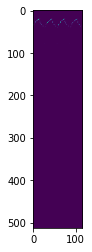

In [20]:
plt.imshow(array.T)

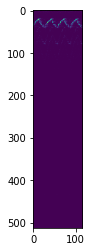

In [21]:
plt.imshow(array2.T)

In [22]:
x = np.max(array2)
print(x)

166.81277465820312


In [23]:
len(array2)

116

In [0]:
x1 = np.argpartition(array2, 10)

In [27]:
print(x1)

[[268 483 233 ... 510   2   0]
 [505 253 266 ...   3   2   0]
 [498 275 268 ...   2 511   0]
 ...
 [264 254 263 ...   3   2   0]
 [252 251 508 ... 510 511   0]
 [506 259 236 ...   3   2   0]]


In [28]:
x2 = np.argmax(array2)
print(x2)

33371


In [0]:
x11 = np.argpartition(array2, 100)

In [30]:
print(x11)

[[200 512 511 ...  75  80  78]
 [235 256 511 ...  39  40   0]
 [236 512 510 ...   2  61   0]
 ...
 [235 512 511 ...   3   2   0]
 [236 512 508 ...  37  36  33]
 [235 512 511 ...   3   2   0]]


In [34]:
print(x11.shape)

(116, 513)
